In [1]:
import os
import numpy as np
import sklearn
from sklearn import preprocessing


In [2]:
os.chdir(r"C:\Users\HP\Downloads\Ningbo\Atrial Flutter")

In [1132]:
import pandas as pd
data=pd.read_csv(r"C:\Users\HP\Downloads\Ningbo\Atrial Flutter\JS15518.csv", header=0)

In [1133]:
normalized = preprocessing.normalize(data)
#print("Normalized Data = ", normalized)

In [1134]:
df=pd.DataFrame(normalized)

In [1135]:
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

class Denoise:

        fs = globals()
        order = globals()
        cutoff_high = globals()
        cutoff_low = globals()
        powerline = globals()
        nyq = globals()

        def set_parameters(**kwargs):
            for key, value in kwargs.items():
                print("{0} = {1}" .format(key, value))

            fs = list(kwargs.values())[0]
            order = list(kwargs.values())[1]
            cutoff_high = list(kwargs.values())[2]
            cutoff_low = list(kwargs.values())[3]
            powerline = list(kwargs.values())[4]

            nyq = 0.5 * fs

            return fs, order, cutoff_high, cutoff_low, powerline, nyq

        assert fs == fs
        assert order == order
        assert cutoff_high == cutoff_high
        assert cutoff_low == cutoff_low
        assert powerline == powerline

        assert nyq == nyq

        ## Butter high pass filter allows frequencies higher than a cut-off value
        def bhpf(cutoff, order, nyq):
            #nyq = 0.5 * fs
            normal_cutoff = cutoff/nyq
            b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
            return b, a

        ## Butter low pass filter allows frequencies lower than a cut-off value
        def blpf(cutoff, order, nyq):
            #nyq = 0.5 * fs
            normal_cutoff = cutoff/nyq
            b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
            return b, a

        ## Notch filter 
        def nf(cutoff, q, nyq):
            #nyq = 0.5 * fs
            freq = cutoff/nyq
            b, a = iirnotch(freq, q)
            return b, a

        ## Applying high pass filter 
        def hpfd(data, cutoff_high, order, nyq):
            b,a = bhpf(cutoff_high, order, nyq)
            x = lfilter(b,a,data)
            return x

        ## Applying low pass filter 
        def lpfd(data, cutoff_low, order, nyq):
            b,a = blpf(cutoff_low, order, nyq)
            y = lfilter(b,a,data)
            return y

        ## Applying notch filter
        def nd(data, powerline, q):
            b,a = nf(powerline,q)
            z = lfilter(b,a,data)
            return z

        ## Ensembling of the filter
        def overlay_filter(data, cutoff_high, cutoff_low, nyq, powerline, fs, order):
            b, a = Denoise.bhpf(cutoff_high, order, nyq)
            x = lfilter(b, a, data)
            d, c = Denoise.blpf(cutoff_low, order, nyq)
            y = lfilter(d, c, x)
            f, e = Denoise.nf(powerline, 30, nyq)
            z = lfilter(f, e, y)     
            return z

        def plot_and_write(df, featurecol_index:int, fs=fs, cutoff_high=cutoff_high, cutoff_low=cutoff_low, nyq=nyq, powerline=powerline, order=order):
            #fs = 500; cutoff_high = 0.5; cutoff_low = 2; powerline = 60
            #order = 5 ## Order of five works well with ECG signals

            plt.figure(1)
            ax1 = plt.subplot(121)
            plt.plot(df.iloc[:,featurecol_index:])
            ax1.set_title("Raw ECG Signal")

            filter_ts_signal = Denoise.overlay_filter(df.iloc[:,featurecol_index:], cutoff_high, cutoff_low, nyq, powerline, fs, order)
            ax2 = plt.subplot(122)
            plt.plot(filter_ts_signal)
            ax2.set_title("Denoised ECG Signal")
            plt.show()
            #filtered_dataset = pd.concat([df.iloc[:,:featurecol_index], filter_ts_signal])
            cols = list(df.iloc[:,featurecol_index:])
            #filtered_dataset = pd.DataFrame({'Date':df.Date, 'Time': df.Time,'ecg1': filter_ts_signal[:, 0], 'ecg2': filter_ts_signal[:, 1],'ecg3': filter_ts_signal[:, 2],'ecg4': filter_ts_signal[:, 3],'ecg5': filter_ts_signal[:, 4]})
            filter_ts_signal_dataset = pd.DataFrame(np.array(filter_ts_signal), columns=cols) 
            filtered_dataset = pd.concat([df.iloc[:, :featurecol_index].reset_index(), filter_ts_signal_dataset.reset_index()], axis=1)
            filtered_dataset.drop(columns=['index'], inplace=True)
            filtered_dataset.to_csv('JS15518.csv', index=None)
            return filtered_dataset

        def write_csv():
            pass

In [1136]:
fs, order, cutoff_high, cutoff_low, powerline, nyq = Denoise.set_parameters(fs = 500, order =5, cutoff_high = 0.1, cutoff_low = 100, powerline = 50)

fs = 500
order = 5
cutoff_high = 0.1
cutoff_low = 100
powerline = 50


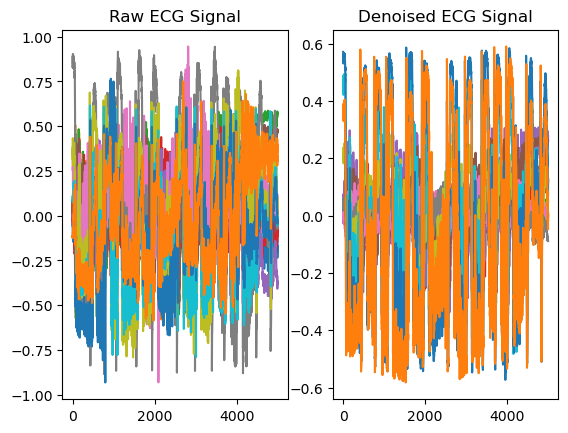

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.000290,-0.000338,0.005694,0.024552,0.043317,0.033577,0.006062,0.043478,0.224728,0.478187,0.571558,0.362723
1,-0.000283,-0.000047,0.007533,0.029855,0.051843,0.041576,0.011190,0.049772,0.236382,0.488640,0.567834,0.342519
2,0.000000,0.000555,0.003868,0.011249,0.016774,0.011464,0.006371,0.056300,0.226371,0.464475,0.554661,0.347999
3,-0.000272,-0.001351,-0.001857,0.002130,0.009620,0.010739,0.007335,0.048601,0.208497,0.449742,0.557279,0.365626
4,0.001070,0.007930,0.025602,0.045049,0.041719,0.009459,-0.011638,0.045436,0.223995,0.457495,0.543039,0.343095
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-0.005097,-0.022911,-0.018105,0.088393,0.255059,0.268317,0.068655,-0.084985,-0.014868,0.112274,0.098653,-0.006414
4995,-0.004747,-0.020529,-0.011244,0.098721,0.262314,0.267529,0.063471,-0.087498,-0.011504,0.122135,0.114171,0.011789
4996,-0.004032,-0.015729,0.002316,0.118286,0.274035,0.262142,0.051747,-0.088124,-0.000721,0.130864,0.115060,0.011496
4997,-0.003618,-0.012947,0.010200,0.129684,0.280702,0.258373,0.044455,-0.087475,0.004756,0.122537,0.083235,-0.027985


In [1137]:
Denoise.plot_and_write(df, featurecol_index=0, fs=fs, cutoff_high=cutoff_high, cutoff_low=cutoff_low, nyq = nyq, powerline=powerline, order=order)

In [1138]:
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
df.iplot()

In [ ]:
df_Clean=pd.read_csv(r"E:\RUMSHA\National University of Sciences & Technology\DAL Research - Rumsha Fatima\Data in excel\XLSX Files\Denoised.csv", header=0)

In [ ]:
df_Clean.iplot()

In [ ]:
import numpy as np
import pywt


try:
    import pathlib
except ImportError:
    import pathlib2 as pathlib
import scipy.signal as signal

In [ ]:
class Detectors:
    """ECG heartbeat detection algorithms
    General useage instructions:
    r_peaks = detectors.the_detector(ecg_in_samples)
    The argument ecg_in_samples is a single channel ECG in volt
    at the given sample rate.
    """

    def __init__(self, sampling_frequency = False):
        """
        The constructor takes the sampling rate in Hz of the ECG data.
        The constructor can be called without speciying a sampling rate to
        just access the detector_list, however, detection won't
        be possible.
        """

        ## Sampling rate
        self.fs = sampling_frequency

        ## This is set to a positive value for benchmarking
        self.engzee_fake_delay = 0

        ## 2D Array of the different detectors: [[description,detector]]
        self.detector_list = [
            ["Elgendi et al (Two average)",self.two_average_detector],
            ["Kalidas & Tamil (Wavelet transform)",self.swt_detector],
            ["Engzee",self.engzee_detector],
            ["Christov",self.christov_detector],
            ["Hamilton",self.hamilton_detector],
            ["Pan Tompkins",self.pan_tompkins_detector],
            ["WQRS",self.wqrs_detector]
        ]

    def get_detector_list(self):
        """
        Returns a 2D array of the different detectors in the form:
        [[description1,detector1],[description2,detector2], ...]
        where description is a string and detector a function pointer
        to the detector. Use this for benchmarking to loop through
        detectors.
        """
        return self.detector_list

In [ ]:
def hamilton_detector(self, unfiltered_ecg):
        """
        P.S. Hamilton, 
        Open Source ECG Analysis Software Documentation, E.P.Limited, 2002.
        """
        
        f1 = 8/self.fs
        f2 = 16/self.fs

        b, a = signal.butter(1, [f1*2, f2*2], btype='bandpass')

        filtered_ecg = signal.lfilter(b, a, unfiltered_ecg)

        diff = abs(np.diff(filtered_ecg))

        b = np.ones(int(0.08*self.fs))
        b = b/int(0.08*self.fs)
        a = [1]

        ma = signal.lfilter(b, a, diff)

        ma[0:len(b)*2] = 0

        n_pks = []
        n_pks_ave = 0.0
        s_pks = []
        s_pks_ave = 0.0
        QRS = [0]
        RR = []
        RR_ave = 0.0

        th = 0.0

        i=0
        idx = []
        peaks = []  

        for i in range(len(ma)):

            if i>0 and i<len(ma)-1:
                if ma[i-1]<ma[i] and ma[i+1]<ma[i]:
                    peak = i
                    peaks.append(i)

                    if ma[peak] > th and (peak-QRS[-1])>0.3*self.fs:        
                        QRS.append(peak)
                        idx.append(i)
                        s_pks.append(ma[peak])
                        if len(n_pks)>8:
                            s_pks.pop(0)
                        s_pks_ave = np.mean(s_pks)

                        if RR_ave != 0.0:
                            if QRS[-1]-QRS[-2] > 1.5*RR_ave:
                                missed_peaks = peaks[idx[-2]+1:idx[-1]]
                                for missed_peak in missed_peaks:
                                    if missed_peak-peaks[idx[-2]]>int(0.360*self.fs) and ma[missed_peak]>0.5*th:
                                        QRS.append(missed_peak)
                                        QRS.sort()
                                        break

                        if len(QRS)>2:
                            RR.append(QRS[-1]-QRS[-2])
                            if len(RR)>8:
                                RR.pop(0)
                            RR_ave = int(np.mean(RR))

                    else:
                        n_pks.append(ma[peak])
                        if len(n_pks)>8:
                            n_pks.pop(0)
                        n_pks_ave = np.mean(n_pks)

                    th = n_pks_ave + 0.45*(s_pks_ave-n_pks_ave)

                    i+=1

        QRS.pop(0)

        return QRS


In [ ]:
def christov_detector(self, unfiltered_ecg):
        """
        Ivaylo I. Christov, 
        Real time electrocardiogram QRS detection using combined 
        adaptive threshold, BioMedical Engineering OnLine 2004, 
        vol. 3:28, 2004.
        """
        total_taps = 0

        b = np.ones(int(0.02*self.fs))
        b = b/int(0.02*self.fs)
        total_taps += len(b)
        a = [1]

        MA1 = signal.lfilter(b, a, unfiltered_ecg)

        b = np.ones(int(0.028*self.fs))
        b = b/int(0.028*self.fs)
        total_taps += len(b)
        a = [1]

        MA2 = signal.lfilter(b, a, MA1)

        Y = []
        for i in range(1, len(MA2)-1):
            
            diff = abs(MA2[i+1]-MA2[i-1])

            Y.append(diff)

        b = np.ones(int(0.040*self.fs))
        b = b/int(0.040*self.fs)
        total_taps += len(b)
        a = [1]

        MA3 = signal.lfilter(b, a, Y)

        MA3[0:total_taps] = 0

        ms50 = int(0.05*self.fs)
        ms200 = int(0.2*self.fs)
        ms1200 = int(1.2*self.fs)
        ms350 = int(0.35*self.fs)

        M = 0
        newM5 = 0
        M_list = []
        MM = []
        M_slope = np.linspace(1.0, 0.6, ms1200-ms200)
        F = 0
        F_list = []
        R = 0
        RR = []
        Rm = 0
        R_list = []

        MFR = 0
        MFR_list = []

        QRS = []

        for i in range(len(MA3)):

            # M
            if i < 5*self.fs:
                M = 0.6*np.max(MA3[:i+1])
                MM.append(M)
                if len(MM)>5:
                    MM.pop(0)

            elif QRS and i < QRS[-1]+ms200:
                newM5 = 0.6*np.max(MA3[QRS[-1]:i])
                if newM5>1.5*MM[-1]:
                    newM5 = 1.1*MM[-1]

            elif QRS and i == QRS[-1]+ms200:
                if newM5==0:
                    newM5 = MM[-1]
                MM.append(newM5)
                if len(MM)>5:
                    MM.pop(0)    
                M = np.mean(MM)    
            
            elif QRS and i > QRS[-1]+ms200 and i < QRS[-1]+ms1200:

                M = np.mean(MM)*M_slope[i-(QRS[-1]+ms200)]

            elif QRS and i > QRS[-1]+ms1200:
                M = 0.6*np.mean(MM)

            # F
            if i > ms350:
                F_section = MA3[i-ms350:i]
                max_latest = np.max(F_section[-ms50:])
                max_earliest = np.max(F_section[:ms50])
                F = F + ((max_latest-max_earliest)/150.0)

            # R
            if QRS and i < QRS[-1]+int((2.0/3.0*Rm)):

                R = 0

            elif QRS and i > QRS[-1]+int((2.0/3.0*Rm)) and i < QRS[-1]+Rm:

                dec = (M-np.mean(MM))/1.4
                R = 0 + dec


            MFR = M+F+R
            M_list.append(M)
            F_list.append(F)
            R_list.append(R)
            MFR_list.append(MFR)

            if not QRS and MA3[i]>MFR:
                QRS.append(i)
            
            elif QRS and i > QRS[-1]+ms200 and MA3[i]>MFR:
                QRS.append(i)
                if len(QRS)>2:
                    RR.append(QRS[-1]-QRS[-2])
                    if len(RR)>5:
                        RR.pop(0)
                    Rm = int(np.mean(RR))

        QRS.pop(0)
        
        return QRS

In [ ]:
def engzee_detector(self, unfiltered_ecg):
        """
        C. Zeelenberg, A single scan algorithm for QRS detection and
        feature extraction, IEEE Comp. in Cardiology, vol. 6,
        pp. 37-42, 1979 with modifications A. Lourenco, H. Silva,
        P. Leite, R. Lourenco and A. Fred, “Real Time
        Electrocardiogram Segmentation for Finger Based ECG
        Biometrics”, BIOSIGNALS 2012, pp. 49-54, 2012.
        """
                
        f1 = 48/self.fs
        f2 = 52/self.fs
        b, a = signal.butter(4, [f1*2, f2*2], btype='bandstop')
        filtered_ecg = signal.lfilter(b, a, unfiltered_ecg)

        diff = np.zeros(len(filtered_ecg))
        for i in range(4, len(diff)):
            diff[i] = filtered_ecg[i]-filtered_ecg[i-4]

        ci = [1,4,6,4,1]        
        low_pass = signal.lfilter(ci, 1, diff)

        low_pass[:int(0.2*self.fs)] = 0
      
        ms200 = int(0.2*self.fs)
        ms1200 = int(1.2*self.fs)        
        ms160 = int(0.16*self.fs)
        neg_threshold = int(0.01*self.fs)

        M = 0
        M_list = []
        neg_m = []
        MM = []
        M_slope = np.linspace(1.0, 0.6, ms1200-ms200)

        QRS = []
        r_peaks = []

        counter = 0

        thi_list = []
        thi = False
        thf_list = []
        thf = False
        newM5 = False

        for i in range(len(low_pass)):

            # M
            if i < 5*self.fs:
                M = 0.6*np.max(low_pass[:i+1])
                MM.append(M)
                if len(MM)>5:
                    MM.pop(0)

            elif QRS and i < QRS[-1]+ms200:

                newM5 = 0.6*np.max(low_pass[QRS[-1]:i])

                if newM5>1.5*MM[-1]:
                    newM5 = 1.1*MM[-1]

            elif newM5 and QRS and i == QRS[-1]+ms200:
                MM.append(newM5)
                if len(MM)>5:
                    MM.pop(0)    
                M = np.mean(MM)    
            
            elif QRS and i > QRS[-1]+ms200 and i < QRS[-1]+ms1200:

                M = np.mean(MM)*M_slope[i-(QRS[-1]+ms200)]

            elif QRS and i > QRS[-1]+ms1200:
                M = 0.6*np.mean(MM)

            M_list.append(M)
            neg_m.append(-M)


            if not QRS and low_pass[i]>M:
                QRS.append(i)
                thi_list.append(i)
                thi = True
            
            elif QRS and i > QRS[-1]+ms200 and low_pass[i]>M:
                QRS.append(i)
                thi_list.append(i)
                thi = True

            if thi and i<thi_list[-1]+ms160:
                if low_pass[i]<-M and low_pass[i-1]>-M:
                    #thf_list.append(i)
                    thf = True
                    
                if thf and low_pass[i]<-M:
                    thf_list.append(i)
                    counter += 1
                
                elif low_pass[i]>-M and thf:
                    counter = 0
                    thi = False
                    thf = False
            
            elif thi and i>thi_list[-1]+ms160:
                    counter = 0
                    thi = False
                    thf = False                                        
            
            if counter>neg_threshold:
                unfiltered_section = unfiltered_ecg[thi_list[-1]-int(0.01*self.fs):i]
                r_peaks.append(self.engzee_fake_delay+
                               np.argmax(unfiltered_section)+thi_list[-1]-int(0.01*self.fs))
                counter = 0
                thi = False
                thf = False

        # removing the 1st detection as it 1st needs the QRS complex amplitude for the threshold
        r_peaks.pop(0)
        return r_peaks

In [ ]:
def swt_detector(self, unfiltered_ecg, MWA_name='cumulative'):
        """
        Stationary Wavelet Transform 
        based on Vignesh Kalidas and Lakshman Tamil. 
        Real-time QRS detector using Stationary Wavelet Transform 
        for Automated ECG Analysis. 
        In: 2017 IEEE 17th International Conference on 
        Bioinformatics and Bioengineering (BIBE). 
        Uses the Pan and Tompkins thresolding.
        """
        
        maxQRSduration = 0.150 #sec
        swt_level=3
        padding = -1
        for i in range(1000):
            if (len(unfiltered_ecg)+i)%2**swt_level == 0:
                padding = i
                break

        if padding > 0:
            unfiltered_ecg = np.pad(unfiltered_ecg, (0, padding), 'edge')
        elif padding == -1:
            print("Padding greater than 1000 required\n")    

        swt_ecg = pywt.swt(unfiltered_ecg, 'db3', level=swt_level)
        swt_ecg = np.array(swt_ecg)
        swt_ecg = swt_ecg[0, 1, :]

        squared = swt_ecg*swt_ecg

        N = int(maxQRSduration*self.fs)
        mwa = MWA_from_name(MWA_name)(squared, N)
        mwa[:int(maxQRSduration*self.fs*2)] = 0

        filt_peaks = panPeakDetect(mwa, self.fs)
        
        return filt_peaks



In [ ]:
def pan_tompkins_detector(self, unfiltered_ecg, MWA_name='cumulative'):
        """
        Jiapu Pan and Willis J. Tompkins.
        A Real-Time QRS Detection Algorithm. 
        In: IEEE Transactions on Biomedical Engineering 
        BME-32.3 (1985), pp. 230–236.
        """
        
        maxQRSduration = 0.150 #sec
        f1 = 5/self.fs
        f2 = 15/self.fs

        b, a = signal.butter(1, [f1*2, f2*2], btype='bandpass')

        filtered_ecg = signal.lfilter(b, a, unfiltered_ecg)        

        diff = np.diff(filtered_ecg) 

        squared = diff*diff

        N = int(maxQRSduration*self.fs)
        mwa = MWA_from_name(MWA_name)(squared, N)
        mwa[:int(maxQRSduration*self.fs*2)] = 0

        mwa_peaks = panPeakDetect(mwa, self.fs)

        return mwa_peaks
    
def two_average_detector(self, unfiltered_ecg, MWA_name='cumulative'):
        """
        Elgendi, Mohamed & Jonkman, 
        Mirjam & De Boer, Friso. (2010).
        Frequency Bands Effects on QRS Detection.
        The 3rd International Conference on Bio-inspired Systems 
        and Signal Processing (BIOSIGNALS2010). 428-431.
        """
        
        f1 = 8/self.fs
        f2 = 20/self.fs

        b, a = signal.butter(2, [f1*2, f2*2], btype='bandpass')

        filtered_ecg = signal.lfilter(b, a, unfiltered_ecg)

        window1 = int(0.12*self.fs)
        mwa_qrs = MWA_from_name(MWA_name)(abs(filtered_ecg), window1)

        window2 = int(0.6*self.fs)
        mwa_beat = MWA_from_name(MWA_name)(abs(filtered_ecg), window2)

        blocks = np.zeros(len(unfiltered_ecg))
        block_height = np.max(filtered_ecg)

        for i in range(len(mwa_qrs)):
            if mwa_qrs[i] > mwa_beat[i]:
                blocks[i] = block_height
            else:
                blocks[i] = 0

        QRS = []

        for i in range(1, len(blocks)):
            if blocks[i-1] == 0 and blocks[i] == block_height:
                start = i
            
            elif blocks[i-1] == block_height and blocks[i] == 0:
                end = i-1

                if end-start>int(0.08*self.fs):
                    detection = np.argmax(filtered_ecg[start:end+1])+start
                    if QRS:
                        if detection-QRS[-1]>int(0.3*self.fs):
                            QRS.append(detection)
                    else:
                        QRS.append(detection)

        return QRS   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from ecgdetectors import Detectors
import sys


ecg12=r"E:\RUMSHA\National University of Sciences & Technology\DAL Research - Rumsha Fatima\Data in excel\XLSX Files\Denoised.csv"
unfiltered_ecg_dat = pd.read_csv(ecg12) 
unfiltered_ecg = unfiltered_ecg_dat.iloc[:5000, 0]
fs = 257

detectors = Detectors(fs)

# selected detector by the user (default is the two average one)
seldet = -1

if seldet < 0:
    # default detector
    r_peaks = detectors.two_average_detector(unfiltered_ecg)
else:
    # We use the input argument to select a detector
    r_peaks = detectors.get_detector_list()[seldet][1](unfiltered_ecg)

# If you want to always use the same det then directly call it:
#r_peaks = detectors.two_average_detector(unfiltered_ecg)
#r_peaks = detectors.swt_detector(unfiltered_ecg)
#r_peaks = detectors.engzee_detector(unfiltered_ecg)
#r_peaks = detectors.christov_detector(unfiltered_ecg)
#r_peaks = detectors.hamilton_detector(unfiltered_ecg)
#r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)



plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.swt_detector(unfiltered_ecg)
plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.engzee_detector(unfiltered_ecg)
plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.christov_detector(unfiltered_ecg)
plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.hamilton_detector(unfiltered_ecg)
plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)
plt.figure()
plt.plot(unfiltered_ecg)
plt.plot(r_peaks, unfiltered_ecg[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
ecgRaw=r"E:\RUMSHA\National University of Sciences & Technology\DAL Research - Rumsha Fatima\Data in excel\XLSX Files\I0002.xlsx"

unfiltered_ecg_dat1 = pd.read_excel(ecgRaw) 
unfiltered_ecgraw = unfiltered_ecg_dat1.iloc[:5000, 0]
fs = 257

detectors = Detectors(fs)

# selected detector by the user (default is the two average one)
seldet = -1

if seldet < 0:
    # default detector
    r_peaks = detectors.two_average_detector(unfiltered_ecgraw)
else:
    # We use the input argument to select a detector
    r_peaks = detectors.get_detector_list()[seldet][1](unfiltered_ecgraw)

# If you want to always use the same det then directly call it:
#r_peaks = detectors.two_average_detector(unfiltered_ecg)
#r_peaks = detectors.swt_detector(unfiltered_ecg)
#r_peaks = detectors.engzee_detector(unfiltered_ecg)
#r_peaks = detectors.christov_detector(unfiltered_ecg)
#r_peaks = detectors.hamilton_detector(unfiltered_ecg)
#r_peaks = detectors.pan_tompkins_detector(unfiltered_ecg)



plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.swt_detector(unfiltered_ecgraw)
plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.engzee_detector(unfiltered_ecgraw)
plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.christov_detector(unfiltered_ecgraw)
plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.hamilton_detector(unfiltered_ecgraw)
plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()

In [ ]:
r_peaks = detectors.pan_tompkins_detector(unfiltered_ecgraw)
plt.figure()
plt.plot(unfiltered_ecgraw)
plt.plot(r_peaks, unfiltered_ecgraw[r_peaks], 'ro')
plt.title("Detected R peaks")

plt.show()